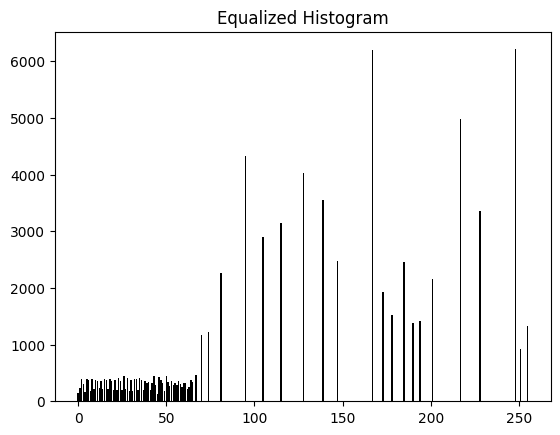

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    histogram = np.zeros((256,), dtype=np.uint32)
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram

def equalize_histogram(image, histogram):
    total_pixels = image.size
    equalized_histogram = np.zeros((256,), dtype=np.uint32)
    sum = 0
    for i in range(256):
        sum += histogram[i]
        equalized_histogram[i] = sum * 255 // total_pixels
    equalized_image = equalized_histogram[image]
    return equalized_image, equalized_histogram

def plot_histogram(histogram):
    plt.bar(np.arange(256), histogram, color='black')
    plt.title('Equalized Histogram')
    plt.show()

def calculate_probability(histogram, total_pixels):
    probability = histogram / total_pixels
    return probability

def cumulative_distribution(probability):
    cumulative_dist = np.cumsum(probability)
    return cumulative_dist * 255

# Đọc ảnh xám
image = cv2.imread('D:/trex.png', cv2.IMREAD_GRAYSCALE)

# Tính histogram của ảnh gốc
original_histogram = calculate_histogram(image)

# Tính tổng số lượng pixel trong ảnh
total_pixels = image.size

# Tính xác suất cho mỗi giá trị mức xám
probability = calculate_probability(original_histogram, total_pixels)

# Tính hàm mật độ xác suất
cdf = cumulative_distribution(probability)

# Làm tròn các giá trị s_k để thu được mức xám của pixel
rounded_cdf = np.round(cdf).astype(np.uint8)

# Tạo ảnh cân bằng histogram từ các giá trị mức xám đã làm tròn
equalized_image = rounded_cdf[image]

# Tính histogram của ảnh đã cân bằng
equalized_histogram = calculate_histogram(equalized_image)

# Vẽ lại histogram của ảnh đã cân bằng
plot_histogram(equalized_histogram)
